# Tensor Basics

In [1]:
import torch
import numpy as np

In [2]:
x=torch.rand(3)

In [4]:
x

tensor([0.9220, 0.9072, 0.1890])

In [5]:
torch.cuda.is_available()

False

In [19]:
x=torch.ones(2,2,3,dtype=torch.int)

In [20]:
x

tensor([[[1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1]]], dtype=torch.int32)

In [21]:
x.dtype

torch.int32

In [22]:
x.size()

torch.Size([2, 2, 3])

In [23]:
x=torch.tensor([2.5,0.1])

In [24]:
x

tensor([2.5000, 0.1000])

In [25]:
x=torch.rand(2,2)
y=torch.rand(2,2)


In [26]:
x+y

tensor([[1.0735, 0.0612],
        [0.9774, 1.7964]])

In [27]:
torch.add(x,y)

tensor([[1.0735, 0.0612],
        [0.9774, 1.7964]])

In [28]:
#ogni funzione che ha un underscore do an in place operation qundi modifica la variabile a cui
#è applicata
y

tensor([[0.2193, 0.0224],
        [0.5289, 0.8690]])

In [29]:
y.add_(x)

tensor([[1.0735, 0.0612],
        [0.9774, 1.7964]])

In [30]:
y

tensor([[1.0735, 0.0612],
        [0.9774, 1.7964]])

In [31]:
y.mul_(x)

tensor([[0.9170, 0.0024],
        [0.4384, 1.6659]])

In [32]:
y

tensor([[0.9170, 0.0024],
        [0.4384, 1.6659]])

In [45]:
a=torch.ones(5)

In [46]:
b=a.numpy()

In [47]:
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [48]:
a

tensor([1., 1., 1., 1., 1.])

In [49]:
a.add_(1)

tensor([2., 2., 2., 2., 2.])

In [50]:
a

tensor([2., 2., 2., 2., 2.])

In [51]:
b # anche b è cambiato perche tutti e due puntano alla stessa memory location

array([2., 2., 2., 2., 2.], dtype=float32)

In [52]:
a=np.ones(5)

In [53]:
b=torch.from_numpy(a)

In [54]:
a

array([1., 1., 1., 1., 1.])

In [55]:
b

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [56]:
a+=1

In [57]:
a

array([2., 2., 2., 2., 2.])

In [58]:
b # anche b è cambiato perche tutti e due puntano alla stessa memory location

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)

In [ ]:
if torch.cuda.is_available():
    device=torch.device('cuda')
    x=torch.ones(5,device=device)
    y=torch.ones(5)
    y=y.to(device)
    z=x+y #il tensore in questo modo si troverà sulla gpu e non è possibile trasformarlo direttamente
        # in un numpy array perchè numpy can only handle cpu tensor
    z=z.to('cpu')
    z=z.numpy()
    

In [19]:
x=torch.randn(3,requires_grad=True)
# vuol dire che bisognerà calcolare i gradienti per questo tensore nell'optimization steps

In [5]:
x

tensor([ 0.5115, -0.7729,  0.1698], requires_grad=True)

In [6]:
y=x+2

In [7]:
y

tensor([2.5115, 1.2271, 2.1698], grad_fn=<AddBackward0>)

In [8]:
z=y*y*2

In [9]:
z

tensor([12.6148,  3.0113,  9.4165], grad_fn=<MulBackward0>)

In [10]:
z=z.mean()

In [11]:
z

tensor(8.3475, grad_fn=<MeanBackward0>)

In [12]:
z.backward() #dz/dx

#se la variabile su cui chiamiamo backward non è uno scalare allora dobbiamo passare
#in input un vettore della stessa dimensione
#v=torch.tensor([0.1,1,0.001],dtype=torch.float32)
#z.backward(v)

In [13]:
z

tensor(8.3475, grad_fn=<MeanBackward0>)

In [16]:
x.grad

tensor([3.3486, 1.6361, 2.8931])

In [ ]:
#per evitare che vengano calcolati i gradienti 
#tacking the history of gradients in the computational graph

#x.requires_grad_(False) quando l underscore sta alla fine vuol dire che la funzione modifica
#                        la variabile in place
#x.detach()
#with torch.no_grad():

In [17]:
x

tensor([ 0.5115, -0.7729,  0.1698], requires_grad=True)

In [18]:
x.requires_grad_(False)

tensor([ 0.5115, -0.7729,  0.1698])

In [20]:
y=x.detach()

In [21]:
y

tensor([ 0.7646, -0.8215, -0.2554])

In [22]:
with torch.no_grad():
    y=x+2

In [23]:
y

tensor([2.7646, 1.1785, 1.7446])

In [24]:
# ogni volta che viene chiamata la funzione backward i gradienti vengono sommati, accumulati 
# nella variabile x.grad, per evitare questo bisogna azzerarli ogni volta
# x.grad.zero_()

weights=torch.ones(4,requires_grad=True)

for epoch in range(3):
    model_output=(weights*3).sum()
    
    model_output.backward()
    
    print(weights.grad)
    
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [29]:
x=torch.tensor(1.0)
y=torch.tensor(2.0)
w=torch.tensor(1.0,requires_grad=True)

#forward pass
y_hat=w*x
loss=(y_hat-y)**2
print(loss)
#backward pass
loss.backward()


print(w.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


# Gradient descent

In [41]:
X=np.array([1,2,3,4],dtype=np.float32)
Y=np.array([2,4,6,8],dtype=np.float32)

w=0

def forward(x):
    return w*x  #dato che w non viene modificata allora è possibile dichiararla fuori
                #w è una variabile globale 
                #se la si vuole modificate all'interno della funzione allora sarà ritornato un errore
                #per modificarla bisogna bisogna specificare che ci stiamo riferendo alla 
                # variabile globale w con global w
                

def loss(y,y_predicted):
    return((y_predicted-y)**2).mean()

# gradient
# MSE= 1/N *(w*x-y)**2
# dJ/dx = 1/N *2x * (w*x-y)

def gradient(x,y,y_predicted):
    return np.dot(2*x,y_predicted-y).mean()

print(f'Prediction before training : f(5) = {forward(5):.3f}')

#training
lr=0.01
n_iters=10

for epoch in range(n_iters):
    
    #prediction = forward pass
    y_pred=forward(X)
    
    #loss
    l=loss(Y,y_pred)
    
    #gradients
    dw=gradient(X,Y,y_pred)
    
    #update weights
    w-=lr*dw
    
    if epoch % 1==0:
        print(f'epoch {epoch+1}: w= {w:.3f},loss={l:.8f}')
        
print(f'Prediction after training : f(5) = {forward(5):.3f}')

Prediction before training : f(5) = 0.000
epoch 1: w= 1.200,loss=30.00000000
epoch 2: w= 1.680,loss=4.79999924
epoch 3: w= 1.872,loss=0.76800019
epoch 4: w= 1.949,loss=0.12288000
epoch 5: w= 1.980,loss=0.01966083
epoch 6: w= 1.992,loss=0.00314570
epoch 7: w= 1.997,loss=0.00050332
epoch 8: w= 1.999,loss=0.00008053
epoch 9: w= 1.999,loss=0.00001288
epoch 10: w= 2.000,loss=0.00000206
Prediction after training : f(5) = 9.999


# Gradient descent with autograd and backpropagation

In [46]:
X=torch.tensor([1,2,3,4])
Y=torch.tensor([2,4,6,8])

w=torch.tensor(0.0,requires_grad=True)

def forward(x):
    return w*x  #dato che w non viene modificata allora è possibile dichiararla fuori
                #w è una variabile globale 
                #se la si vuole modificate all'interno della funzione allora sarà ritornato un errore
                #per modificarla bisogna bisogna specificare che ci stiamo riferendo alla 
                # variabile globale w con global w
                

def loss(y,y_predicted):
    return((y_predicted-y)**2).mean()



print(f'Prediction before training : f(5) = {forward(5):.3f}')

#training
lr=0.01
n_iters=10

for epoch in range(n_iters):
    
    #prediction = forward pass
    y_pred=forward(X)
    
    #loss
    l=loss(Y,y_pred)
    
    #gradients
    l.backward()
    
    #update weights
    #PyTorch doesn’t allow in-place operations on leaf variables
    #that have requires_grad=True (such as parameters of your model) 
    #because the developers could not decide how such an operation should behave
    with torch.no_grad():
        w-=lr*w.grad
    
    w.grad.zero_()
    
    if epoch % 1==0:
        print(f'epoch {epoch+1}: w= {w:.3f},loss={l:.8f}')
        
print(f'Prediction after training : f(5) = {forward(5):.3f}')





Prediction before training : f(5) = 0.000
epoch 1: w= 0.300,loss=30.00000000
epoch 2: w= 0.555,loss=21.67499924
epoch 3: w= 0.772,loss=15.66018772
epoch 4: w= 0.956,loss=11.31448650
epoch 5: w= 1.113,loss=8.17471695
epoch 6: w= 1.246,loss=5.90623236
epoch 7: w= 1.359,loss=4.26725292
epoch 8: w= 1.455,loss=3.08308983
epoch 9: w= 1.537,loss=2.22753215
epoch 10: w= 1.606,loss=1.60939169
Prediction after training : f(5) = 8.031


In [47]:
x=torch.tensor([2,3,4])

In [48]:
x+=2

In [49]:
x

tensor([4, 5, 6])

In [51]:
x=torch.tensor([2,3,4],requires_grad=True,dtype=torch.float32)

In [52]:
x

tensor([2., 3., 4.], requires_grad=True)

In [53]:
x+=2

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [54]:
with torch.no_grad():
    x+=2

In [55]:
x

tensor([4., 5., 6.], requires_grad=True)

## Training pipeline

* design model (input,output size,forward pass)
* construct loss and optimizer
* training loop:
     *  forward pass: compute prediction
     * backward pass : gradients
     * update weights

In [2]:
import torch
import torch.nn as nn

X=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

X_test=torch.tensor([5],dtype=torch.float32)

n_samples,n_features=X.shape

input_size=n_features
output_size=n_features

#model= nn.Linear(input_size,output_size)

class LinearRegression(nn.Module):

    def __init__(self,input_dim,output_dim):
        #super(LinearRegression,self).__init__()
        super().__init__()
        #define layers
        self.lin=nn.Linear(input_dim,output_dim)
    
    def forward(self,x):
        return self.lin(x)

model= LinearRegression(input_size,output_size)

print(f'Prediction before training : f(5) = {model(X_test).item():.3f}')

#training
lr=0.01
n_iters=100

loss=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=lr)

for epoch in range(n_iters):
    
    #prediction = forward pass
    y_pred=model(X)
    
    #loss
    l=loss(Y,y_pred)
    
    #gradients
    l.backward()
    
    #update weights
    optimizer.step()

    optimizer.zero_grad()
    
    if epoch % 10==0:
        [w,b]=model.parameters()
        print(f'epoch {epoch+1}: w= {w[0][0]:.3f},loss={l:.8f}')
        
print(f'Prediction before training : f(5) = {model(X_test).item():.3f}')


# Linear Regression

epoch 1 , loss 5828.7080
epoch 11 , loss 4317.2529
epoch 21 , loss 3224.1060
epoch 31 , loss 2432.6299
epoch 41 , loss 1858.9894
epoch 51 , loss 1442.8387
epoch 61 , loss 1140.6775
epoch 71 , loss 921.1057
epoch 81 , loss 761.4321
epoch 91 , loss 645.2377


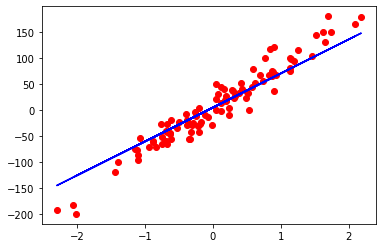

In [29]:
import torch
import torch.nn as nn 
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0 prepare data

x_numpy,y_numpy=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)

x=torch.from_numpy(x_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))

y=y.view(y.shape[0],1)

n_samples,n_features=x.shape

# 1 model

input_size=n_features
output_size=1

model= nn.Linear(input_size,output_size)

# 2 loss and optimizer
lr=0.01
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=lr)

# 3 training loop
num_epoch=100
for epoch in range(num_epoch):
    y_pred=model(x)
    loss=criterion(y_pred,y)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

    if epoch % 10 ==0:
        
        print(f'epoch {epoch+1} , loss {loss.item():.4f}')

#plot

predicted=model(x).detach().numpy()
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predicted,'b')
plt.show()


# Logistic Regression

In [35]:
import torch
import torch.nn as nn 
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

bc=datasets.load_breast_cancer()


x,y=bc.data, bc.target

n_samples,n_features=x.shape

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)

# scale

sc=StandardScaler()               #in modo che le features abbiano media zero e vaianza 1
X_train=sc.fit_transform(X_train) # calcola ma media e la std e le usa per standardizzare il train
X_test=sc.transform(X_test)     # usa la media e la std trovata nel train per standardizzare il test


X_train=torch.from_numpy(X_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32))
y_test=torch.from_numpy(y_test.astype(np.float32))

y_train=y_train.view(y_train.shape[0],1)
y_test=y_test.view(y_test.shape[0],1)

class LogisticRegression(nn.Module):
    
    def __init__(self,n_input_features):
        super(LogisticRegression,self).__init__()
        self.linear=nn.Linear(n_input_features,1)
    def forward(self,x):
        y_pred=torch.sigmoid(self.linear(x))
        return y_pred
    
model=LogisticRegression(n_features)

lr=0.01
criterion= nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=lr)

epochs=100

for e in range(epochs):
    
    #forward pass and loss
    y_pred=model(X_train)
    loss=criterion(y_pred,y_train)
    
    #backward pass
    loss.backward()
    
    #updates
    optimizer.step()
    
    #zero gradients
    optimizer.zero_grad()
    
    if e%10 ==0:
        print(f'epoch {e+1} , loss {loss.item():.4f}')
        
with torch.no_grad():
    y_pred=model(X_test)
    y_pred_class=y_pred.round()
    
    acc=y_pred_class.eq(y_test).sum()/ float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')
    

epoch 1 , loss 0.6697
epoch 11 , loss 0.5162
epoch 21 , loss 0.4278
epoch 31 , loss 0.3716
epoch 41 , loss 0.3327
epoch 51 , loss 0.3040
epoch 61 , loss 0.2818
epoch 71 , loss 0.2641
epoch 81 , loss 0.2496
epoch 91 , loss 0.2374
accuracy = 0.9298


# Dataset and DataLoader Batch training 

In [16]:
import torch 
import torchvision
from torch.utils.data import Dataset,DataLoader
import numpy as np
import math

In [33]:
class WineDataset(Dataset):
    def __init__(self):
        #data loader
        xy=np.loadtxt('./wine.csv',delimiter=',',dtype=np.float32,skiprows=1)
        self.x=torch.from_numpy(xy[:,1:])
        self.y=torch.from_numpy(xy[:,[0]])  #in modo che lo shape sia n_samples,1
        self.n_samples=xy.shape[0]
        
        # es
        # a=np.array([[1,2,3],[4,5,6],[7,8,9]])
        # a[:,[0]]
        # array([[1],
        #       [4],
        #       [7]])
        
          
    def __getitem__(self,index):
        return self.x[index],self.y[index]
        
    def __len__(self):
        return self.n_samples
        
# create dataset
dataset=WineDataset()

first_data=dataset[0]
features, label=first_data
#print(features, labels)

# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
dataloader=DataLoader(dataset=dataset,batch_size=4,shuffle=True)

# convert to an iterator and look at one random sample
dataiter=iter(dataloader)
data=dataiter.next()
features,labels=data
#print(features, labels)


#training loop
num_epochs=2
total_samples=len(dataset)
n_iterations=math.ceil(total_samples/4)


for e in range(num_epochs):
    for i, (inputs,labels) in enumerate(dataloader):
        # here: 178 samples, batch_size = 4, n_iters=178/4=44.5 -> 45 iterations
        # Run your training process
        if (i+1) % 5 == 0:
            print(f'Epoch: {e+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')



Epoch: 1/2, Step 5/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 10/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 15/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 20/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 25/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 30/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 35/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 40/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 45/45| Inputs torch.Size([2, 13]) | Labels torch.Size([2, 1])
Epoch: 2/2, Step 5/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 10/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 15/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 20/45| Inputs torch.Size([4, 13]) | L

In [34]:
# some famous datasets are available in torchvision.datasets
# e.g. MNIST, Fashion-MNIST, CIFAR10, COCO

train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=torchvision.transforms.ToTensor(),  
                                           download=True)

train_loader = DataLoader(dataset=train_dataset, 
                                           batch_size=3, 
                                           shuffle=True)

# look at one random sample
dataiter = iter(train_loader)
data = dataiter.next()
inputs, targets = data
print(inputs.shape, targets.shape)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

torch.Size([3, 1, 28, 28]) torch.Size([3])


# Dataset Transforms

In [43]:
import torch 
import torchvision
from torch.utils.data import Dataset,DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    
    def __init__(self,transform=None):
        #data loader
        xy=np.loadtxt('./wine.csv',delimiter=',',dtype=np.float32,skiprows=1)
        
        self.x=xy[:,1:]
        self.y=xy[:,[0]] 
        self.n_samples=xy.shape[0]
        
        self.transform=transform
        
        # es
        # a=np.array([[1,2,3],[4,5,6],[7,8,9]])
        # a[:,[0]]
        # array([[1],
        #       [4],
        #       [7]])
        
          
    def __getitem__(self,index):
        sample= self.x[index],self.y[index]
        
        if self.transform:
            sample=self.transform(sample)
        
        return sample
    
    def __len__(self):
        return self.n_samples
    
class ToTensor:
    
    def __call__(self,sample):
        inputs,targets =sample
        return torch.from_numpy(inputs),torch.from_numpy(targets)

    
class MulTransform:
    
    def __init__(self,factor):
        self.factor=factor
        
    def __call__(self,sample):
        inputs,targets =sample
        inputs*=self.factor
        return inputs,targets

#dataset=WineDataset(transform=ToTensor())
dataset=WineDataset(transform=None)

first_data=dataset[0]
features,labels=first_data
print(features)
print(type(features),type(labels))


composed=torchvision.transforms.Compose([ToTensor(),MulTransform(2)])
dataset=WineDataset(transform=composed)
first_data=dataset[0]
features,labels=first_data
print(features)
print(type(features),type(labels))

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>
